# Homework 4: An MITgcm Tutorial Experiment

Name: Megan Sharkey

Date: September 12, 2025

#### Overview
In class, we walked through the MITgcm tutorial for the barotropic gyre. In this homework, you'll work through another experiment - the `tutorial_global_oce_latlon` configuration. 

Documentation for this tutorial is additionally provided on the MITgcm documentation page [HERE](https://mitgcm.readthedocs.io/en/latest/examples/global_oce_latlon/global_oce_latlon.html).

Before beginning, import Python modules for manging and plotting data, and define a path to the model directory on your machine:

In [5]:
# import pertinent modules
import os
import numpy as np
import matplotlib.pyplot as plt

# define a path to the model directory
model_dir = '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/MITgcm/verification/tutorial_global_oce_latlon'

### Part 1: Plot the model bathymetry
One good way to examine the construction of a model is to plot the bathymetry. The bathymetry for this model is stored in the `input/bathymetry.bin` file. Create a plot of the bathymetry below. Be sure to label your axes and give the plot a colorbar with a sensible color map.

Hint: The grid is stored as a 2D grid with `float32` precision. Look at the `SIZE.h` file to determine the grid shape. 

*** nSx term is code for multithreading 

(40, 90) (40, 90)


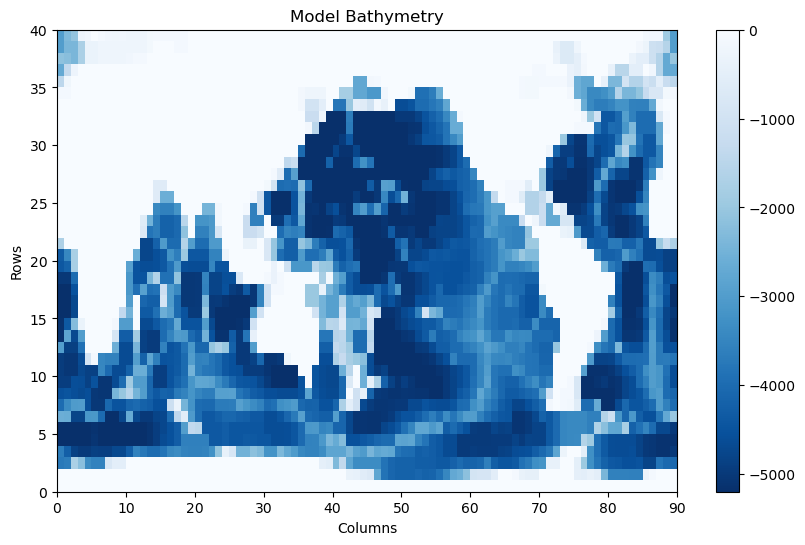

In [6]:
# read in the model bathymetry file and reshape to the grid dimensions
bathymetry_file = os.path.join(model_dir, 'input', 'bathymetry.bin')

n_rows = 40 #sNy
n_cols = 90 #sNx
dx = 4
dy = 4

x = np.arange(0,n_cols*dx,dx)
y = np.arange(0,n_rows*dy,dy)
X,Y = np.meshgrid(x,y)

# print the shape of X and Y
print(np.shape(X), np.shape(Y))

bathymetry_grid = np.fromfile(bathymetry_file, '>f4').reshape((n_rows, n_cols))

# plot the bathymetry
fig = plt.figure(figsize = (10,6))
C = plt.pcolormesh(bathymetry_grid, cmap='Blues_r')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model Bathymetry')
plt.show()

### Part 2: Compile the Model
Next, compile the model on your machine. 

Before you begin your compilation, make two changes to the files in the code directory:
1. In the packages.conf file, remove the lines for `mnc`, `timeave`, and `ptracers` and add a new line for `diagnostics`.
2. Add the `DIAGNOSTICS_SIZE.h` file provided with this notebook.

Once you make these changes, compile the model code.

Refer to the class example or the [Getting Started with MITgcm](https://profmikewood.github.io/ocean_modeling_book/mitgcm/getting_started_with_MITgcm.html) section of the course notes for help.

#### Question:
How many CPUs will this model use on your machine?

Answer: This model will use 2 CPUs to run two models, as indicated by the nPx = 2. 

### Part 3: Run the Model
After your compilation is complete, run the model in the `run` directory. 

Before running this model, make the following updates to the default tutorial:
1. In the `data` file, change `nIter=0` to `nIter=70080` and place the the `pickup.0000070080.data`, `pickup.0000070080.meta`, `pickup_cd.0000070080.data` and `pickup_cd.0000070080.meta` files provided with this notebook in your run directory. This will allow you to start the model after it has already been run for several decades.
2. Update the model timesteps to run for a duration of one year. Implement this change by looking in the `data` file to determine the number of seconds for each model timesteps (`deltaTClock`). Then, compute how many timesteps will be needed to run the model for one year by determining how many seconds are in one year (365 days) and dividing by the timestep. Then, update the timesteps on the line `nTimesteps=...,` in the `data` file.
3. In the `data` file, add a new line for `useSingleCpuIO=.TRUE.,` in the `PARM01` section just below the line that says `readBinaryPrec=32,`.
4. In the `data` file, in `PARM03`, update the following three lines as follows:
```
 pChkptFreq= 31536000.,
# dumpFreq=   864000.,
# taveFreq=   864000.,
```
   Note that the comment indicators (`#`) must be in the first column.
   
5. Add the `data.diagnostics` file provided with this notebook into your run directory. This will request the model to output monthly averages of temperature (`THETA`), salinity (`SALT`), zonal velocity (`UVEL`), and meridional velocity (`VVEL`).
6. In the file `data.pkg`, remove the line for `usePTRACERS=.TRUE.,` and add a new line for `useDIAGNOSTICS=.TRUE.,`.

After making these changes, run the model. 

Again, you can refer to the class example or the [Getting Started with MITgcm](https://profmikewood.github.io/ocean_modeling_book/mitgcm/getting_started_with_MITgcm.html) section of the course notes for help.

#### Questions:

1. What is the model timestep in seconds? days?
   
The model timestep is 86,400 seconds which is equivilent to 1 day. 

2. How many timesteps are required to run the model for one year?
   
To run the model for one year, the number of timesteps required is 365. 



### Part 4: Assess the Model Results
Upon successful completion of your model run, you should have the following files: `THETA.0000070445.data`, `SALT.0000070445.data`, `UVEL.0000070445.data`, and `VVEL.0000070445.data`. These files contain the surface fields for temperature, salinity, zonal velocity, and meridional velocity in the month of December. 

Read these files into four separate grids and make a 2x2 set of subplots showing the surface temperature, salinity, zonal velocity, and meridional velocity simulated by the model. 

In [7]:
# read in the data from files into grids for theta, salt, uvel, and vvel

# I had issues with my MITgcm directory in my MS 274 directory (used above),
# so I had to run the Part 2 & 3 model in a different MITgcm directory for it to work. 
# Therefore I'm creating a new model_dir variable to access the data (calling it model_dir_2)

model_dir_2 = '/Users/msharkey/Documents/MLML/FALL 2025/MITgcm/verification/tutorial_global_oce_latlon'

# surface temperature
theta_file = os.path.join(model_dir_2, 'run', 'THETA.0000070445.data')
theta_grid = np.fromfile(theta_file, '>f4').reshape((n_rows, n_cols)) 

# surface salinity
salt_file = os.path.join(model_dir_2, 'run', 'SALT.0000070445.data')
salt_grid = np.fromfile(salt_file, '>f4').reshape((n_rows, n_cols))

# surface zonal velocity 
zonal_file = os.path.join(model_dir_2, 'run', 'UVEL.0000070445.data')
uvel_grid = np.fromfile(zonal_file, '>f4').reshape((n_rows, n_cols))

# surface meridional velocity
meridional_file = os.path.join(model_dir_2, 'run', 'VVEL.0000070445.data')
vvel_grid = np.fromfile(meridional_file, '>f4').reshape((n_rows, n_cols))



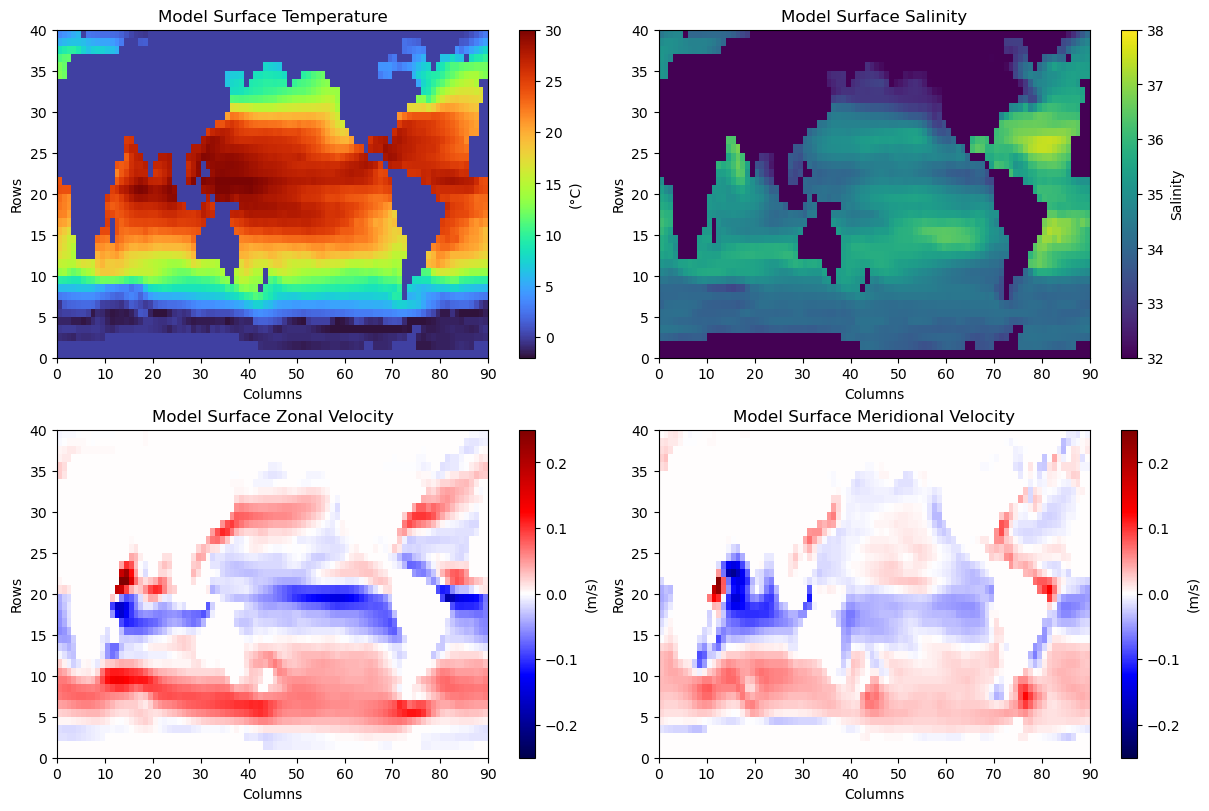

In [8]:
# make the 2x2 plot here

fig = plt.figure(figsize=(12,8), constrained_layout=True)

# surface temperature
plt.subplot(2,2,1)
plt.pcolormesh(theta_grid, vmin = -2, vmax = 30, cmap='turbo')
plt.colorbar(label='(°C)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model Surface Temperature')

# surface salinity
plt.subplot(2,2,2)
plt.pcolormesh(salt_grid,vmin = 32, vmax = 38)
plt.colorbar(label='Salinity')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model Surface Salinity')

# surface zonal velocity
plt.subplot(2,2,3)
plt.pcolormesh(uvel_grid, cmap='seismic', vmin = -0.25, vmax = 0.25)
plt.colorbar(label='(m/s)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model Surface Zonal Velocity')

# surface meridional velocity
plt.subplot(2,2,4)
plt.pcolormesh(vvel_grid, cmap='seismic', vmin = -0.25, vmax = 0.25)
plt.colorbar(label='(m/s)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model Surface Meridional Velocity')

plt.show()

#### Questions

How do these fields compare to those from the ECCO state estimates? What features are consistent between the models? What features are different? Identify at least two real oceanographic features simulated in this simple model of the ocean.

Looking back at class plots of the ECCO state estimates, there are definite similarities in the trends observed. Consistent features between the two models are the global temperature and salinity trends. In both the MITgcm model above and the ECCO state estimates, salinity plots reveal the Atlantic ocean is the saltiest region of the global ocean basins. Additionally, both models show similar trends in gobal sea surface temperature, with the warmest water near the equator, and temperatures dropping nearing the poles. Overall, the MITgcm model plots are less detailed than the ECCO model plots when compared at the same time interval of one month (Here I am referring to the ECCO plots generated in HW1). The zonal and meridional velocity plots from the MITgcm model do show surface velocity patterns that resemble the ocean gyres, however these gyres are much more visible in the ECCO model (seen in HW1). The MITgcm model does not capture the Equatorial Counter Current, whereas the ECCO model does a great job at this. Additionally, the ECCO model clearly shows the eastern and western boundary currents, but these are not as clear in the MITgcm model (perhaps aside from the Gulf Stream). Another limitation of the MITgcm model is its lack of high resolution velocity data in the polar regions. Details of surface velocity around Greenland, for example, are almost completely missing. The ECCO model delivers a much clearer and robust picture of surface velocity. 